In [24]:
from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [25]:
T = 1
delta_t = 0.2
num_it = int(T/delta_t)
hx = -1
hz = 1
omega = np.pi/(2*T)

def lam_t(jt):
    return np.sin(omega*jt)**2

def lam_t_diff(jt):
    return omega*np.sin(2*omega*jt)

def termino_CD(jt):
    # DUDA: En el paper DAdQC la fórmula sería con -lam_t_diff(jt), pero el resultado con CD sería el opuesto.
    # ¿ERRATA?
    return -hx * hz * ( lam_t_diff(jt) ) / (2 * ( hx**2 * (1-lam_t(jt))**2 + hz**2 * lam_t(jt)**2 ) )

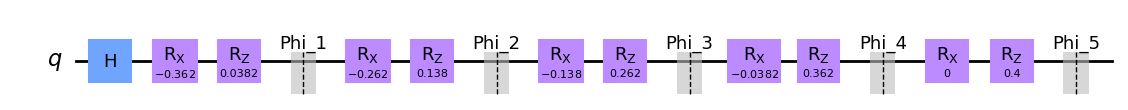

[Statevector([0.69787081+0.11391371j, 0.69301172+0.14048043j],
             dims=(2,)),
 Statevector([0.68599942+0.15640625j, 0.65470412+0.27623251j],
             dims=(2,)),
 Statevector([0.68586552+0.11267516j, 0.59469508+0.40401801j],
             dims=(2,)),
 Statevector([0.6892725 +1.38777878e-17j, 0.50773456+5.16825927e-01j],
             dims=(2,)),
 Statevector([0.67553294-0.13693731j, 0.39493621+0.6073951j ],
             dims=(2,))]

In [26]:
backend = Aer.get_backend("statevector_simulator")

circ = QuantumCircuit(1)

circ.h(0)

for i in [delta_t*i for i in range(1,num_it+1)]:
    circ.rx(2*(1-lam_t(i))*hx*delta_t,0)
    circ.rz(2*lam_t(i)*hz*delta_t,0)
    #circ.ry(2*termino_CD(i)*delta_t,0)
    circ.save_statevector(label=f"Phi_{int(i/delta_t)}")

display(circ.draw("mpl"))


job = backend.run(circ).result()

stv = [job.data(0)[f"Phi_{i}"] for i in range(1,num_it+1)]
stv

In [27]:
def get_probabilities(svector):
    return np.power(np.abs(svector.data),2)

qubit_1 = Statevector.from_label("1")

res = [0.5]

for i in stv:
    print(get_probabilities(i)[1])
    res.append(get_probabilities(i)[1])

0.5000000000000001
0.5049418760212184
0.5168927907480004
0.5249034198248334
0.5249034198248334


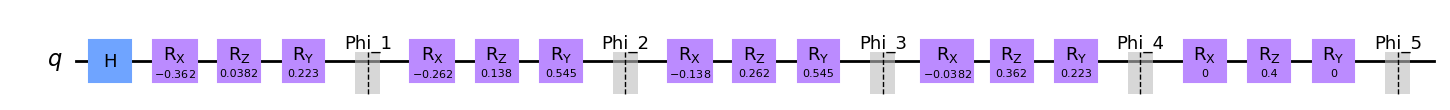

[Statevector([0.61634285+0.09755859j, 0.76642704+0.15229381j],
             dims=(2,)),
 Statevector([0.38459181+0.07364006j, 0.86494209+0.31391313j],
             dims=(2,)),
 Statevector([0.14523609-0.0392293j , 0.87767628+0.45502954j],
             dims=(2,)),
 Statevector([0.04238988-0.11411353j, 0.79122642+0.59928453j],
             dims=(2,)),
 Statevector([0.01887405-0.12026043j, 0.65639512+0.74453116j],
             dims=(2,))]

In [28]:
backend = Aer.get_backend("statevector_simulator")

circ_cd = QuantumCircuit(1)

circ_cd.h(0)

for i in [delta_t*i for i in range(1,num_it+1)]:
    circ_cd.rx(2*(1-lam_t(i))*hx*delta_t,0)
    circ_cd.rz(2*lam_t(i)*hz*delta_t,0)
    circ_cd.ry(2*termino_CD(i)*delta_t,0)
    circ_cd.save_statevector(label=f"Phi_{int(i/delta_t)}")

display(circ_cd.draw("mpl"))


job = backend.run(circ_cd).result()

stv_cd = [job.data(0)[f"Phi_{i}"] for i in range(1,num_it+1)]
stv_cd

In [29]:
res_cd = [0.5]

for i in stv_cd:
    print(get_probabilities(i)[1])
    res_cd.append(get_probabilities(i)[1])

0.6106038143687244
0.8466662773283868
0.9773675399422176
0.9851812002867913
0.9851812002867916


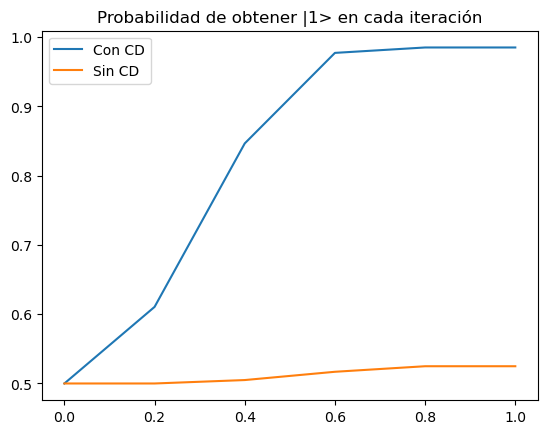

In [30]:
plt.plot([i*delta_t for i in range(num_it+1)],res_cd)
plt.plot([i*delta_t for i in range(num_it+1)],res)

plt.title("Probabilidad de obtener |1> en cada iteración")
plt.legend(["Con CD","Sin CD"])

plt.show()

In [ ]:
from qiskit import IBMQ, assemble, transpile
from qiskit_ibm_provider import IBMProvider, least_busy

api_key = "807454d47ee36239856f1751489e9a6c0df8e433a4c335f8cd9d4d7fc697fce7f1d6fbeec86553b2cd8d3d61ae73114b9c704a520699b9ba5b0eb3afd2c1dab1"
provider = IBMProvider(api_key)

In [ ]:
backend = least_busy(provider.backends(simulator=False))
backend

In [ ]:
transpiled_circ = transpile(circ,backend)
transpiled_circ.draw("mpl")

In [ ]:
result = backend.run(circ.decompose(),shots=1000).result()

In [ ]:
mi_circ = QuantumCircuit(3,3)

mi_circ.h([0,1,2])
mi_circ.rx(0.1234,0)
mi_circ.rz(0.2233,1)
mi_circ.ry(1.24,2)

mi_circ.save_statevector()

mi_circ.draw("mpl")

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeVigo

device_backend = FakeVigo()

backend = AerSimulator.from_backend(device_backend)

backend = AerSimulator(method='density_matrix')

In [ ]:
transpile(mi_circ,backend).draw("mpl")